In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_new=pd.read_csv('Salary_Data.csv')

In [3]:
df_new

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df=df_new

## EDA

In [5]:
df.shape

(30, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


-Not a missing value nor datatype get changed

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## outliers detection and treatment

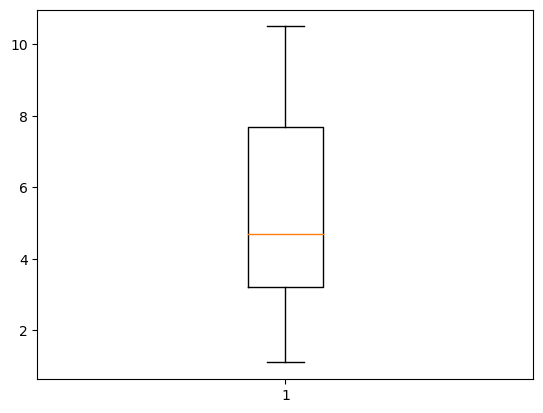

In [8]:
plt.boxplot(df['YearsExperience']);

-Inference

from above boxplot thier is no outlier.

Data is slightly right skewed.

Most of the data is between 3 to 7 and median is 5

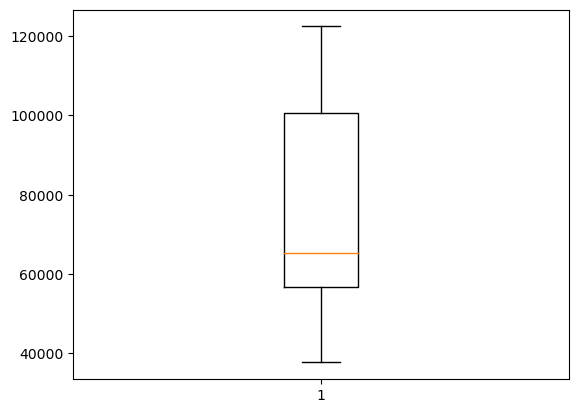

In [9]:
plt.boxplot(df['Salary']);

-Inference

from above boxplot thier is no outlier.

Data is slightly right skewed.

Majority of the data is between 50000 to 100000 and mean is around 65000

## Data Transformation

In [10]:
df.skew(axis = 0, skipna = True)

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


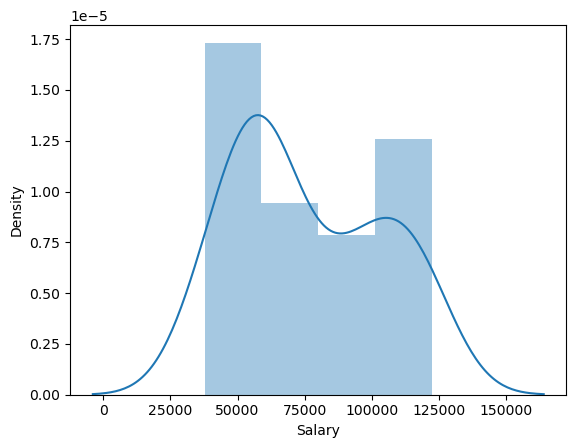

In [12]:

sns.distplot(df['Salary']); 

In [13]:
df.Salary.skew()

0.35411967922959153

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


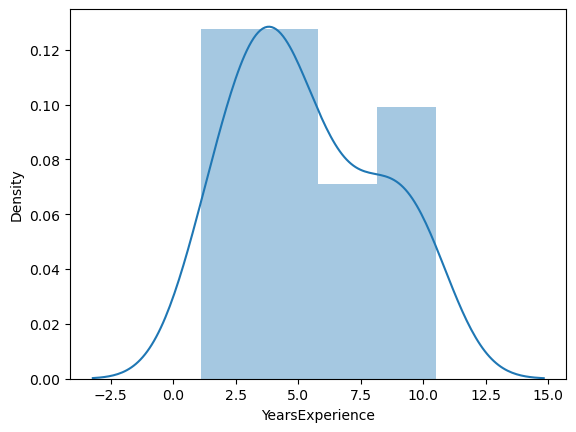

In [14]:

sns.distplot(df['YearsExperience']); 

In [15]:
df.YearsExperience.skew()

0.37956024064804106

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
import numpy as np
df['YearsExperience']=np.sqrt(df['YearsExperience'])

In [18]:
df['YearsExperience'].skew()

-0.04919608394250605

In [19]:
df['Salary']=np.sqrt(df['Salary'])

In [20]:
df['Salary'].skew()

0.16904336802767353

# Prediction model

In [21]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = df).fit()         

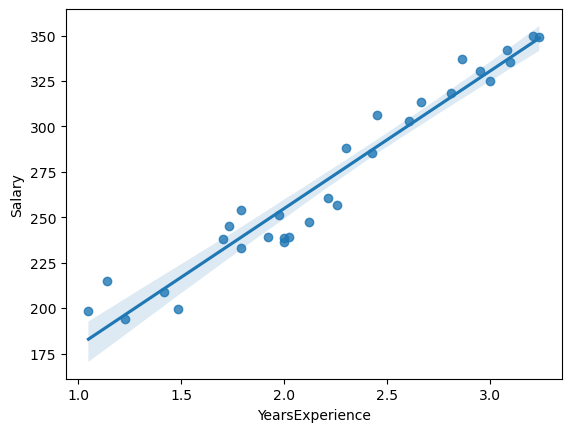

In [22]:
sns.regplot(x='YearsExperience', y='Salary', data=df);

In [23]:
model.params

Intercept          103.568031
YearsExperience     75.626932
dtype: float64

In [24]:
print(model.tvalues,'\n',model.pvalues)

Intercept          12.663496
YearsExperience    21.315126
dtype: float64 
 Intercept          4.141645e-13
YearsExperience    7.584326e-19
dtype: float64


In [25]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9419490138976825, 0.9398757643940283)

# Predict for new data point

In [26]:
newdata=pd.Series([4,9])

In [27]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred       

,YearsExperience
0,4
1,9


In [28]:
model.predict(data_pred)

0    406.075758
1    784.210418
dtype: float64

# calculating Error

In [29]:
yhat1=model.predict(df['YearsExperience'])
yhat1

0     182.886226
1     189.796000
2     196.191728
3     210.520663
4     215.740898
5     232.356055
6     234.557719
7     238.853599
8     238.853599
9     249.039339
10    252.919254
11    254.821894
12    254.821894
13    256.700896
14    263.996980
15    270.975381
16    274.357689
17    277.674303
18    287.265210
19    288.815425
20    300.778941
21    305.082231
22    316.132184
23    320.130606
24    326.635432
25    330.448826
26    336.665890
27    337.889509
28    346.282180
29    348.627298
dtype: float64

In [30]:
yact=df['Salary']
yact

0     198.350700
1     214.953483
2     194.244691
3     208.626460
4     199.727314
5     237.995798
6     245.254969
7     233.334524
8     253.860198
9     239.142217
10    251.431899
11    236.207536
12    238.656657
13    238.916303
14    247.206392
15    260.649190
16    256.961087
17    288.249892
18    285.242003
19    306.496330
20    302.882816
21    313.485247
22    318.279751
23    337.360341
24    330.803567
25    324.933839
26    342.007310
27    335.611382
28    349.844251
29    349.101704
Name: Salary, dtype: float64

In [31]:
#MAE
from sklearn.metrics import mean_absolute_error

In [32]:
mae=mean_absolute_error(yact, yhat1)

In [33]:
mae

9.57681783799315